# Drug Reviews
The objective of the project is to predict the sentiment of the drug users, according to their reviews, ratings, conditions and other features.

Explanation of variables:
* uniqueID: a unique id
* drugName: name of drug
* condition: name of the condition the patient is suffering from
* review: patient review
* rating: the patient's rating for the drug between 0-10 stars
* date: date of review entry
* usefulCount: number of users who upvoted the review


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualisation


In [3]:
df_train = pd.read_csv('drugsComTrain_raw.csv')
df_test = pd.read_csv('drugsComTest_raw.csv')
df_train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [4]:
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (161297, 7)
Test shape: (53766, 7)


In [5]:
all_data = pd.concat([df_train, df_test])
all_data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


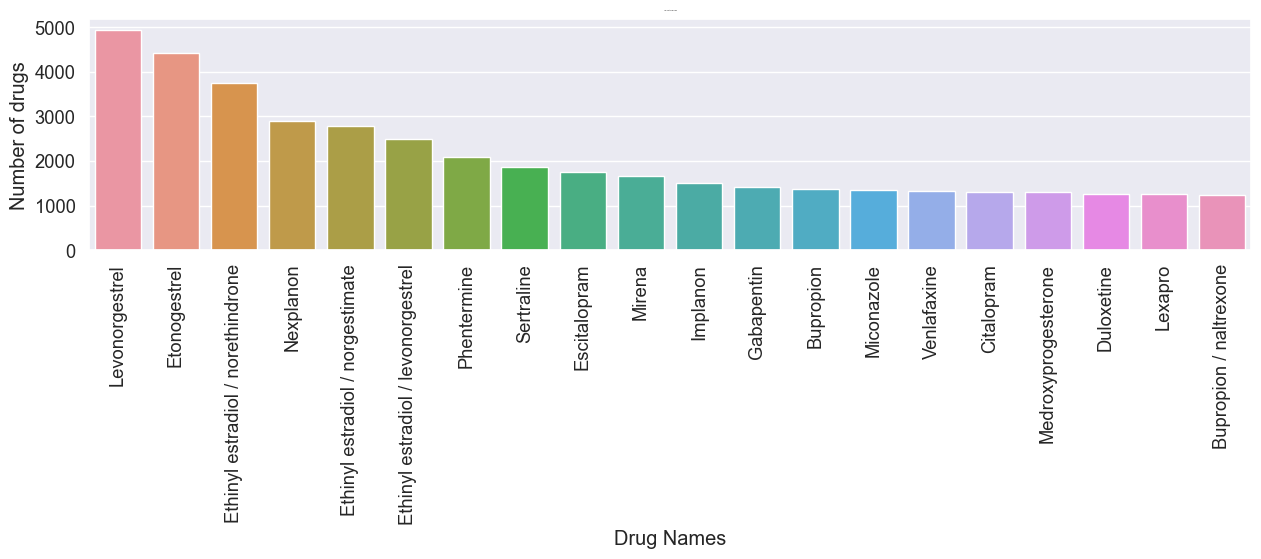

In [6]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 3]
drugs = all_data.pivot_table(index = ['drugName'], aggfunc = 'size')
drugs_sorted = drugs.sort_values(ascending=False)
drugs = drugs_sorted.head(20)

sns_drugs = sns.barplot(x = drugs.index, y = drugs.values)
sns.set(font_scale = 0.01)
sns_drugs.set_title('The most used drugs')
sns_drugs.set_ylabel("Number of drugs")
sns_drugs.set_xlabel("Drug Names")
plt.setp(sns_drugs.get_xticklabels(), rotation=90);


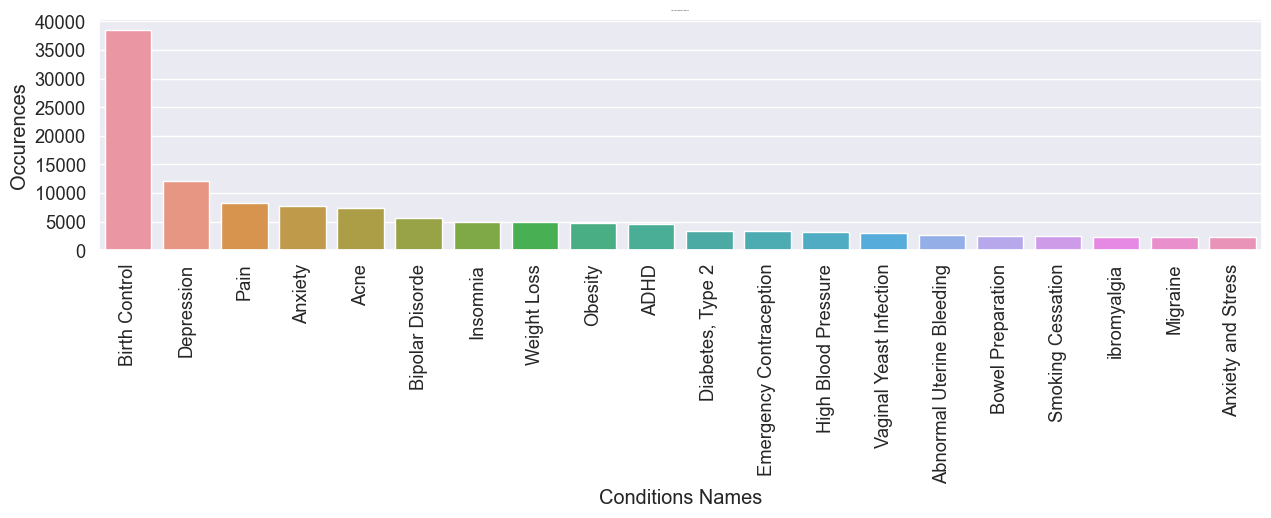

In [7]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15,3]

conditions = all_data.pivot_table(index = ['condition'], aggfunc='size')
conditions_sorted = conditions.sort_values(ascending = False)
conditions = conditions_sorted.head(20)

sns_conditions = sns.barplot(x = conditions.index, y = conditions.values)
sns.set(font_scale = 0.01)
sns_conditions.set_title('The most common conditions')
sns_conditions.set_ylabel("Occurences")
sns_conditions.set_xlabel("Conditions Names")
plt.setp(sns_conditions.get_xticklabels(), rotation=90);

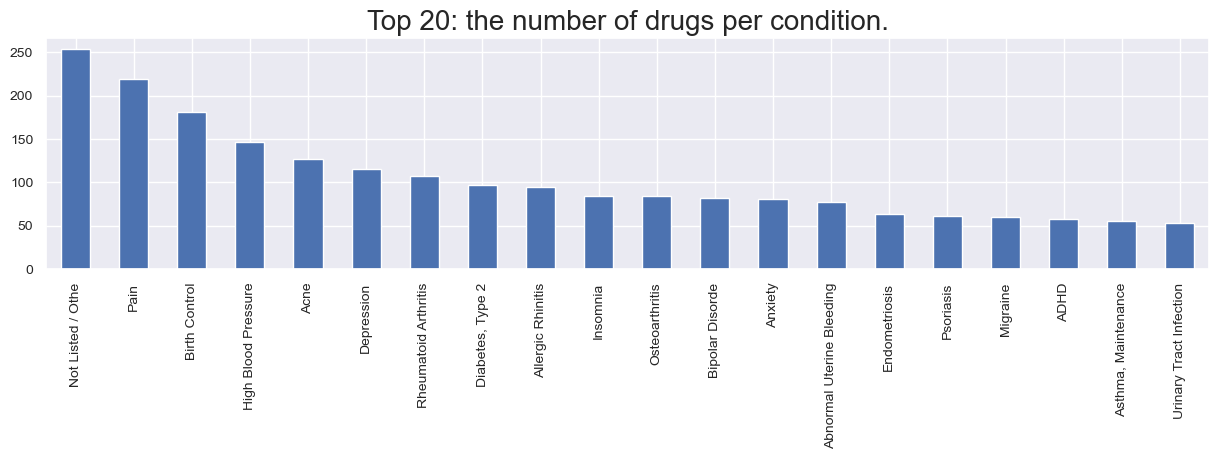

In [8]:
data = all_data
data = data[data["condition"].str.contains("users found") == False]
# nunique() function counts the number of unique entries in a column of a dataframe
condDrug = data.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False)
condDrug.head(20).plot(kind = 'bar', figsize = (15, 3), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top 20: the number of drugs per condition.", fontsize = 20)
plt.show()

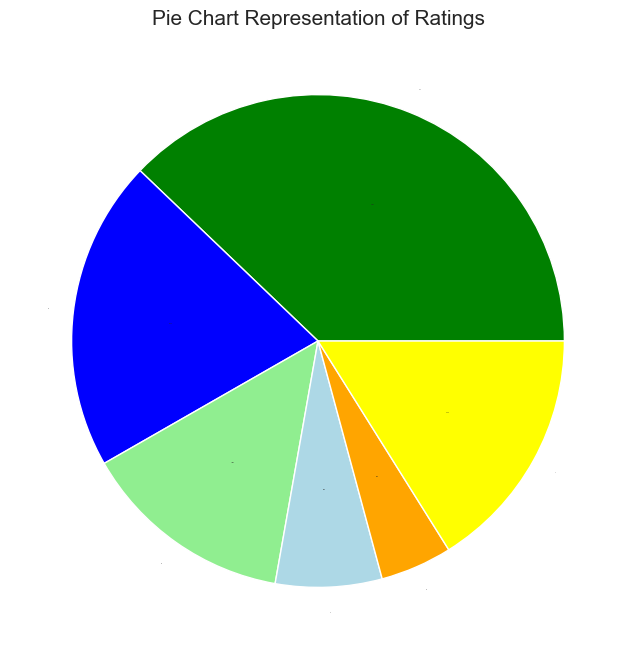

In [9]:
# a donut chart that represents the ratings of the drugs
data = [all_data['rating'].value_counts()[10], all_data['rating'].value_counts()[9],all_data['rating'].value_counts()[8],all_data['rating'].value_counts()[7],all_data['rating'].value_counts()[6],all_data['rating'].value_counts()[1]]
colors = ['green', 'blue', 'lightgreen', 'lightblue', 'orange', 'yellow']
label = "10", "9", "8", "7", "6", "1"

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(data, colors = colors, labels = label, autopct = '%1.1f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 15)
p = plt.gcf()
plt.show()

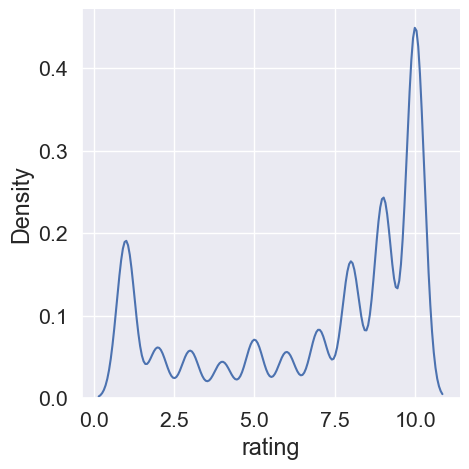

In [10]:
#the distribution of ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')

sns_1 = sns.displot(data = all_data['rating'], kind="kde")


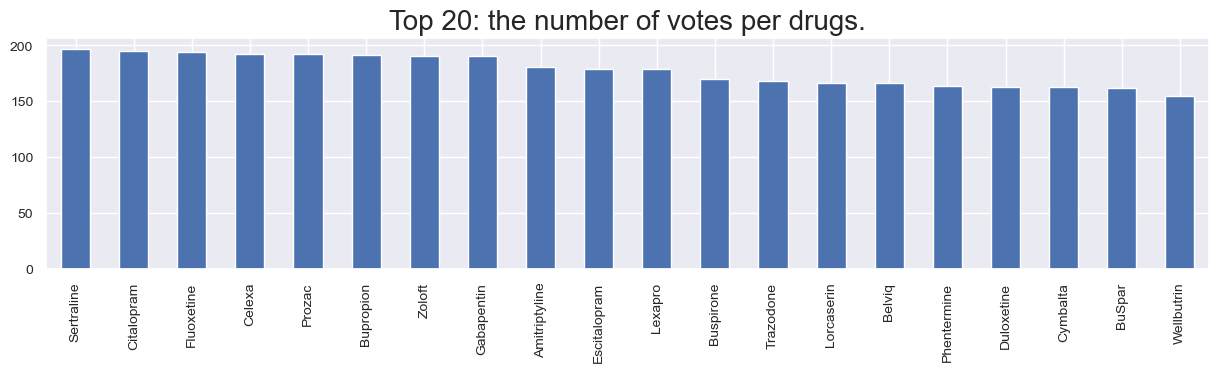

In [11]:
data = all_data
# nunique() function counts the number of unique entries in a column of a dataframe
condDrug = data.groupby(['drugName'])['usefulCount'].nunique().sort_values(ascending = False)
condDrug.head(20).plot(kind = 'bar', figsize = (15, 3), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top 20: the number of votes per drugs.", fontsize = 20)
plt.show()

In [12]:
all_data['date'] = pd.to_datetime(all_data['date'], errors = 'coerce')
all_data['Year'] = all_data['date'].dt.year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(df_train['Year'], palette ='colorblind')
plt.title('The No. of Reviews each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

KeyError: 'Year'

# Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
X_train = df_train['review']
y_train = df_train['rating']
X_test = df_test['review']
y_test = df_test['rating']

In [ ]:
vect = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2))
X_train = vect.fit_transform(X_train.tolist())
X_test = vect.transform(X_test.tolist())

In [ ]:
model = MultinomialNB().fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, train_pred))
print('Testing Accuracy:', accuracy_score(y_test, test_pred))

Training Accuracy: 0.7560029014798787
Testing Accuracy: 0.5582338280697838


Based on the analysis of the model's performance, it seems that the model is likely overfitting. This means that the model is performing well on the training data but is not generalizing well to new data, resulting in poor predictions. To address this issue, one approach is to modify the rating columns in the dataset to help the model make better predictions. By making changes to the rating column, the model can better capture the underlying patterns in the data and improve its ability to make accurate predictions.

In [ ]:
df_train['new_rating'] = df_train[(df_train['rating'] > 7) | (df_train['rating'] < 4)]['rating']
df_test['new_rating'] = df_test[(df_test['rating'] > 7) | (df_test['rating'] < 4)]['rating']

# 1 is good rating, 0 is bad rating
df_train['new_rating'] = df_train['new_rating'].apply(lambda x: 1 if x > 7 else 0)
df_test['new_rating'] = df_test['new_rating'].apply(lambda x: 1 if x > 7 else 0)

In [ ]:
X_train = df_train['review']
X_test = df_test['review']
y_train = df_train['new_rating']
y_test = df_test['new_rating']

In [ ]:
vect = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2))
X_train = vect.fit_transform(X_train.tolist())
X_test = vect.transform(X_test.tolist())

nb = MultinomialNB().fit(X_train, y_train)
train_pred = nb.predict(X_train)
test_pred = nb.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, train_pred))
print('Testing Accuracy:', accuracy_score(y_test, test_pred))

Training Accuracy: 0.9623055605497932
Testing Accuracy: 0.8763530855931257


In [ ]:
alphas = np.array([0.001, 0.01, 0.1, 0, 1, 10, 100])

train_accu = []
test_accu = []

for alpha in alphas:
    nb = MultinomialNB(alpha=alpha).fit(X_train, y_train)
    train_pred = nb.predict(X_train)
    test_pred = nb.predict(X_test)
    
    train_accu.append(accuracy_score(y_train, train_pred))
    test_accu.append(accuracy_score(y_test, test_pred))

print('Training Accuracies')
print(train_accu)
print('Testing Accuracies')
print(test_accu)

c:\Users\voicu\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Training Accuracies
[0.9922317216067255, 0.9909917729406003, 0.9859017836661562, 0.9932360800262869, 0.9623055605497932, 0.7370750850914772, 0.6107429152433089]
Testing Accuracies
[0.8894096640999889, 0.8930736896923707, 0.8944500241788491, 0.8778782129970614, 0.8763530855931257, 0.6916452776847822, 0.6077260722389615]


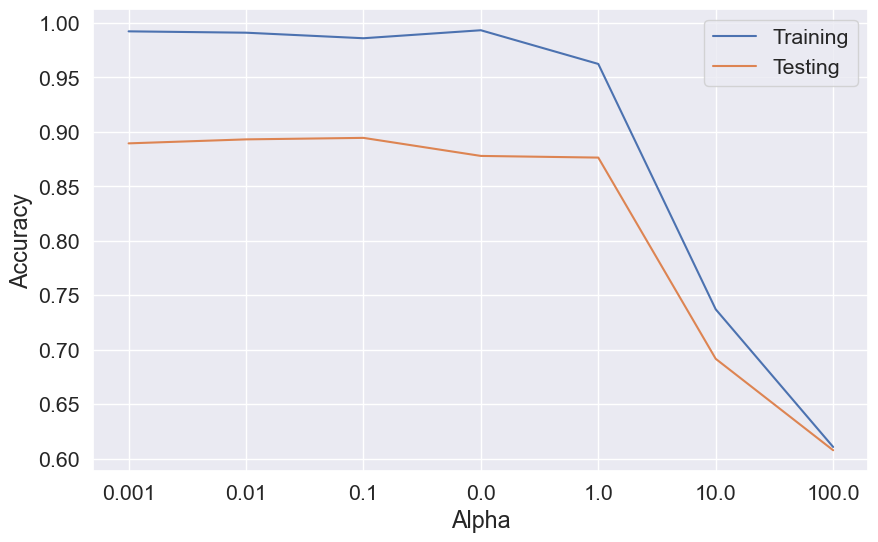

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(len(alphas))),train_accu, label='Training')
plt.plot(list(range(len(alphas))), test_accu, label='Testing')
plt.xticks(list(range(len(alphas))), alphas)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend();